In [1]:
import pandas as pd

In [6]:


# Load the dataset
df = pd.read_csv('Diabetes.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values by replacing them with the median (or any other suitable method)
df.fillna(df.median(), inplace=True)

# Verify that there are no missing values left
missing_values_after = df.isnull().sum()
print("Missing values after cleaning:\n", missing_values_after)


Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the target variable (Outcome)
label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

# Normalize the features
scaler = StandardScaler()
features = df.drop('Outcome', axis=1)
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with normalized features
df_normalized = pd.DataFrame(scaled_features, columns=features.columns)
df_normalized['Outcome'] = df['Outcome']

#preview normalized data
df_normalized.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [13]:
# Generate descriptive statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
descriptive_stats.head()

Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000


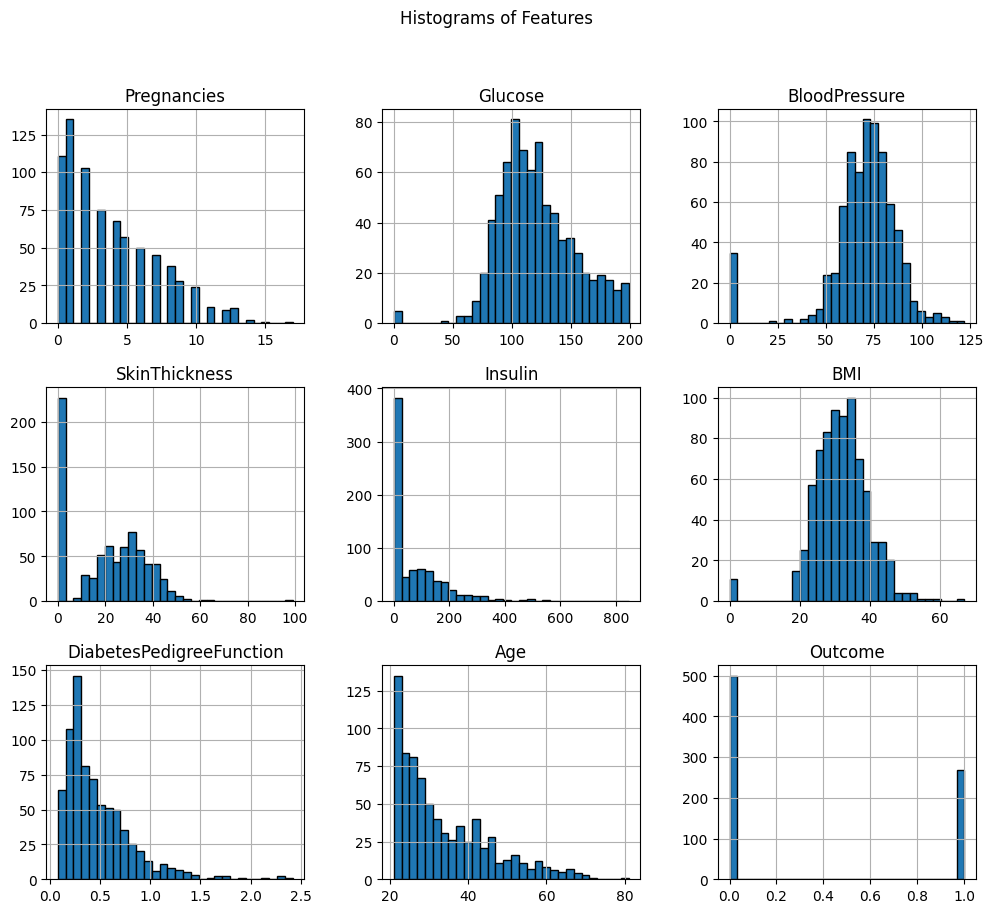

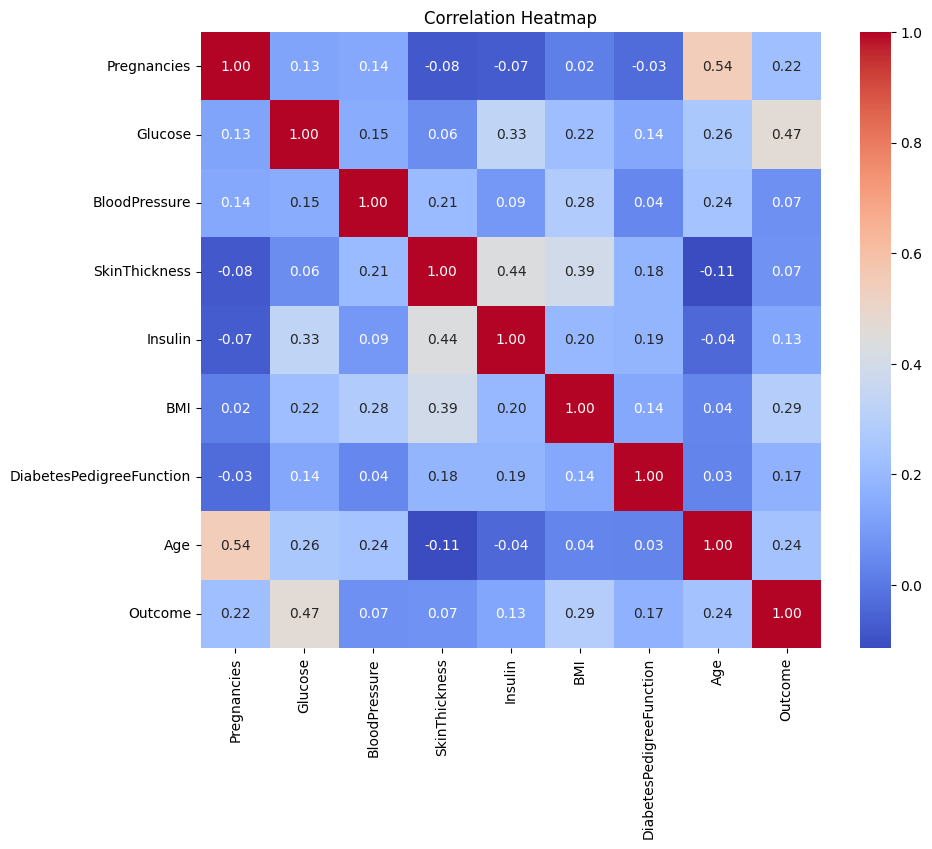

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each feature
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('Diabetes.csv')

# Split the data into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:

from sklearn.svm import SVC
# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Logistic Regression Evaluation
y_pred = logistic_model.predict(X_test)
print("Logistic Regression Model Evaluation:")
logistic_acc = accuracy_score(y_test, y_pred)
logistic_report = classification_report(y_test, y_pred)
logistic_cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {logistic_acc}")
print("Classification Report:\n", logistic_report)
print("Confusion Matrix:\n", logistic_cm)

# Decision Tree Evaluation
# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)
print("\nDecision Tree Model Evaluation:")
tree_acc = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree)
tree_cm = confusion_matrix(y_test, y_pred_tree)
print(f"Accuracy: {tree_acc}")
print("Classification Report:\n", tree_report)
print("Confusion Matrix:\n", tree_cm)

# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Model Evaluation:")
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)
print(f"Accuracy: {rf_acc}")
print("Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_cm)

# SVM Evaluation
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Model Evaluation:")
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)
print(f"Accuracy: {svm_acc}")
print("Classification Report:\n", svm_report)
print("Confusion Matrix:\n", svm_cm)


Logistic Regression Model Evaluation:
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[78 21]
 [18 37]]

Decision Tree Model Evaluation:
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[75 24]
 [15 40]]

Random Forest Model Evaluation:
Accuracy: 0.7207792207792207
Classification Report:
        

                 Model  Accuracy  Precision (Class 0)  Precision (Class 1)  \
0  Logistic Regression  0.746753             0.812500             0.637931   
1        Decision Tree  0.746753             0.833333             0.625000   
2        Random Forest  0.720779             0.785714             0.607143   
3                  SVM  0.753247             0.808081             0.654545   

   Recall (Class 0)  Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  \
0          0.787879          0.672727            0.800000            0.654867   
1          0.757576          0.727273            0.793651            0.672269   
2          0.777778          0.618182            0.781726            0.612613   
3          0.808081          0.654545            0.808081            0.654545   

   True Negatives  False Positives  False Negatives  True Positives  
0              78               21               18              37  
1              75               24               15            

In [26]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you have trained your models and have the y_test and predictions
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model,
    "SVM": svm_model
}

# Evaluate each model and create individual tables for accuracy and classification reports
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Create a table for accuracy score
    accuracy_table = PrettyTable()
    accuracy_table.field_names = ["Model", "Accuracy"]
    accuracy_table.add_row([model_name, round(accuracy, 2)])
    
    # Create a table for classification report
    classification_report_table = PrettyTable()
    classification_report_table.field_names = ["Metric", "Class 0", "Class 1"]
    classification_report_table.add_row(["Precision", round(report['0']['precision'], 2), round(report['1']['precision'], 2)])
    classification_report_table.add_row(["Recall", round(report['0']['recall'], 2), round(report['1']['recall'], 2)])
    classification_report_table.add_row(["F1-score", round(report['0']['f1-score'], 2), round(report['1']['f1-score'], 2)])
    
    # Create a table for confusion matrix
    confusion_matrix_table = PrettyTable()
    confusion_matrix_table.field_names = ["Actual \\ Predicted", "Class 0", "Class 1"]
    confusion_matrix_table.add_row(["Class 0", cm[0, 0], cm[0, 1]])
    confusion_matrix_table.add_row(["Class 1", cm[1, 0], cm[1, 1]])
    
    # Print each table for the current model
    print(f"Accuracy for {model_name}:")
    print(accuracy_table)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report_table)
    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix_table)
    print("\n" + "="*50 + "\n")


Accuracy for Logistic Regression:
+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
| Logistic Regression |   0.75   |
+---------------------+----------+

Classification Report for Logistic Regression:
+-----------+---------+---------+
|   Metric  | Class 0 | Class 1 |
+-----------+---------+---------+
| Precision |   0.81  |   0.64  |
|   Recall  |   0.79  |   0.67  |
|  F1-score |   0.8   |   0.65  |
+-----------+---------+---------+

Confusion Matrix for Logistic Regression:
+--------------------+---------+---------+
| Actual \ Predicted | Class 0 | Class 1 |
+--------------------+---------+---------+
|      Class 0       |    78   |    21   |
|      Class 1       |    18   |    37   |
+--------------------+---------+---------+


Accuracy for Decision Tree:
+---------------+----------+
|     Model     | Accuracy |
+---------------+----------+
| Decision Tree |   0.75   |
+---------------+----------+

Classification Report for De

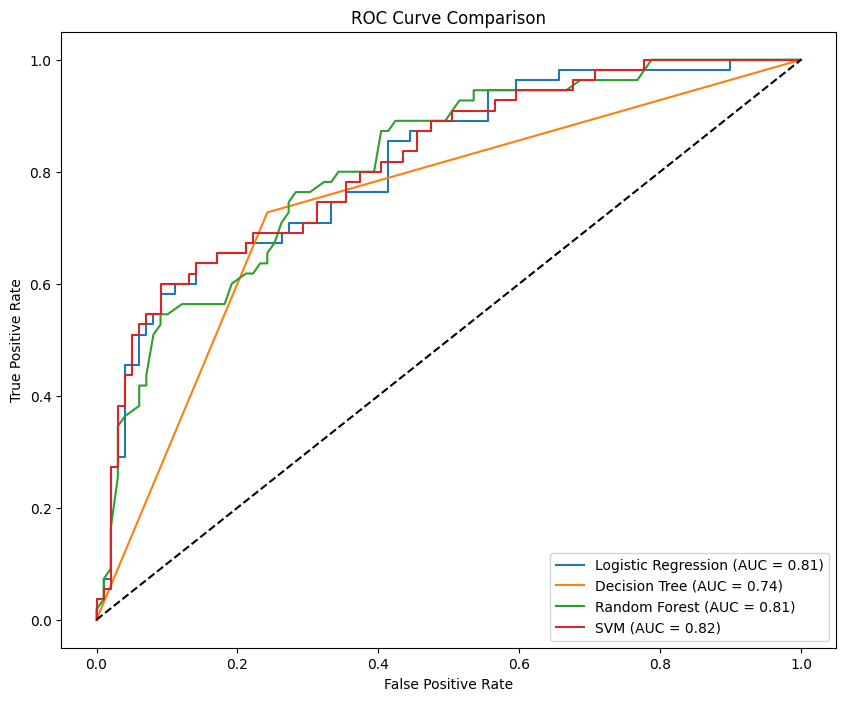

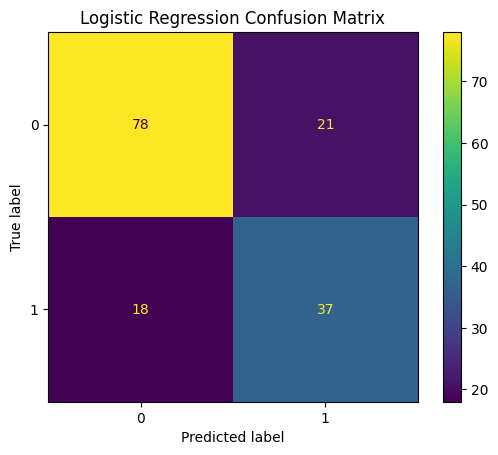

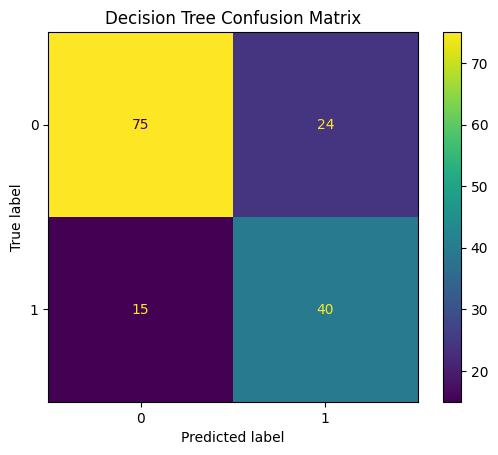

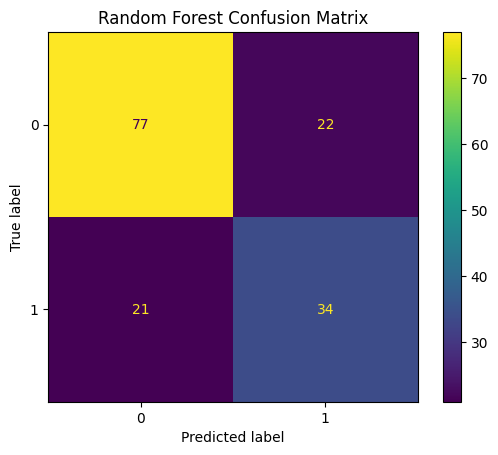

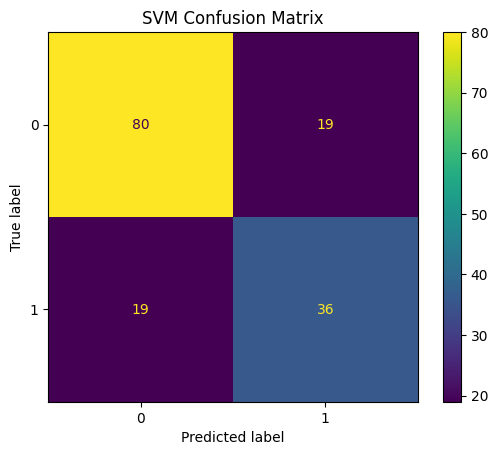

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))

# Logistic Regression ROC Curve
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')

# Decision Tree ROC Curve
fpr, tpr, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')

# Random Forest ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# SVM ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Visualization for Each Model
models = [('Logistic Regression', logistic_cm), ('Decision Tree', tree_cm), ('Random Forest', rf_cm), ('SVM', svm_cm)]
for model_name, cm in models:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
